# Preprocessing medical imaging data using Python

This notebook will help you get started with 3D medical imaging processing. The idea behind this notebook is to know how to live with the data (because beleive me it is more important than training a model)

## Run On Colab

<a href="https://colab.research.google.com/drive/1FwoqCg5-Wwut0ln7BqELkxGP_nFw0JrL?usp=sharing" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Helpers

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_slice_3d(image, index = 0):
    # Display the image using Matplotlib
    plt.imshow(image[:,:,index], cmap='gray')
    plt.title('Image')
    plt.show()

In [31]:
def show_slice_4d(image, index = 0):
    # Display the image using Matplotlib
    plt.imshow(image[0,:,:,index], cmap='gray')
    plt.title('Image')
    plt.show()

### CropForeground in 2D or 3D

In [3]:
from monai.transforms import CropForeground

#### In a 2D array

In [119]:
array_2D = [
    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]]]

#### In a 3D array

<img src="assets/crop_foreground.png" width="600"/>


In [7]:
image = np.array(
    [
    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]],

    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 2, 1, 0, 0],
      [0, 0, 1, 3, 2, 0, 0],
      [0, 0, 1, 2, 1, 0, 0],
      [0, 0, 4, 2, 9, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]],

    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 2, 1, 0, 0],
      [0, 0, 1, 3, 2, 0, 0],
      [0, 0, 1, 2, 1, 0, 0],
      [0, 0, 4, 2, 9, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]],

    [[0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0]]
      ])  # 3x10x7



cropper = CropForeground(return_coords=True)
crpped, Sxy, Exy = cropper(image)

print('Starting Point', Sxy)
print('End Point', Exy)

Starting Point [4 2]
End Point [8 5]


c:\Users\amine\anaconda3\envs\impact\lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.array CropForeground.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


#### In a 3D Nifti file

In [11]:
nifti_file = nib.load('assets/ct_windowed.nii.gz')
np_array = nifti_file.get_fdata()
np_array.shape

(512, 512, 240)

In [12]:
crop_roi = CropForeground(return_coords=True, margin=0)
cropped_roi, xy1, xy2 = crop_roi(np_array)

print('Old Shape:', np_array.shape)
print('New Shape:', cropped_roi.shape)
print('Starting Point', xy1)
print('End Point', xy2)

c:\Users\amine\anaconda3\envs\impact\lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.array CropForeground.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


Old Shape: (512, 512, 240)
New Shape: torch.Size([512, 339, 240])
Starting Point [54  0]
End Point [393 240]


--------------------------------------------

### Change image orientation

In [13]:
from monai.transforms import Orientation

In [17]:
orientation_changer = Orientation(axcodes='LAS')
image = nib.load('assets/ct.nii.gz').get_fdata()
oriented_image = orientation_changer(image)

c:\Users\amine\anaconda3\envs\impact\lib\site-packages\monai\transforms\spatial\array.py:635: UserWarning: axcodes ('LAS') length is smaller than number of input spatial dimensions D=2.
Orientation: spatial shape = (175, 301), channels = 231,please make sure the input is in the channel-first format.
  warnings.warn(


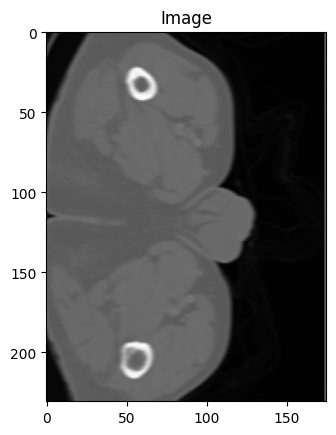

In [15]:
# Display the image using Matplotlib
plt.imshow(image[:,:,0], cmap='gray')
plt.title('Image')
plt.show()

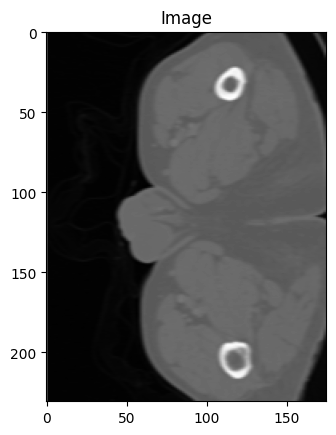

In [18]:
# Display the image using Matplotlib
plt.imshow(oriented_image[:,:,0], cmap='gray')
plt.title('Image')
plt.show()

------------------------------------------------------------

### Scale the intensity

In [19]:
from monai.transforms import ScaleIntensity, ScaleIntensityRange 

In [20]:
array = nib.load('assets/ct.nii.gz').get_fdata()
intensity_scaler = ScaleIntensity(minv=0, maxv=1)

sclaed_array = intensity_scaler(array)

In [21]:
print(np.min(array))
print(np.min(sclaed_array))

print(np.max(array))
print(np.max(sclaed_array))

-1094.0
0.0
1865.0
1.0


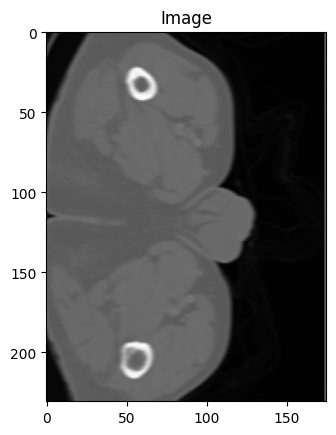

In [22]:
show_slice_3d(array)

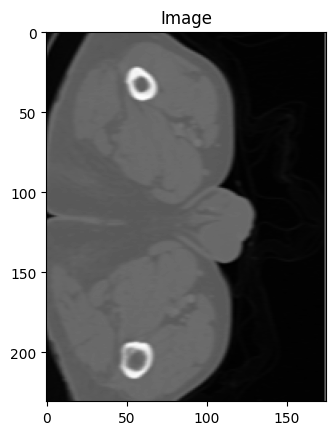

In [23]:
show_slice_3d(sclaed_array)

#### Scaled Intensity Ranged (can control the visualization)

In [24]:
ranged_intensity_scaler = ScaleIntensityRange(a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True)

ranged_scaled_array = ranged_intensity_scaler(array)

In [25]:
print(np.min(ranged_scaled_array))
print(np.max(ranged_scaled_array))

0.0
1.0


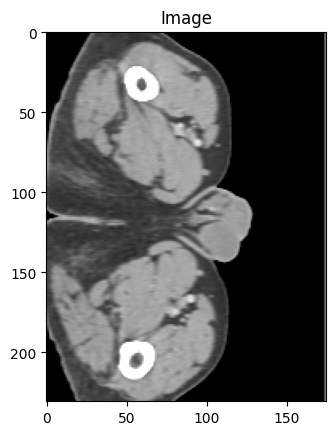

In [26]:
show_slice_3d(ranged_scaled_array)

---------------------------------------------------------------------

### Random Gaussian Noise

In [27]:
from monai.transforms import GaussianSmooth

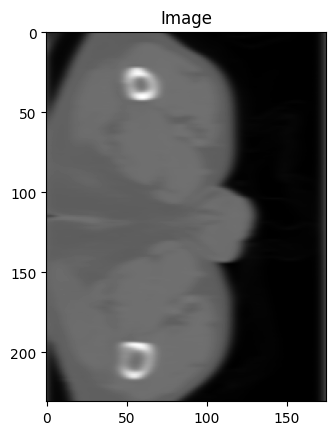

In [28]:
gaussian_smooth = GaussianSmooth(sigma=3)
smooth_array = gaussian_smooth(array)
show_slice_3d(smooth_array)

------------------------------------------------

### Random Rotations

In [29]:
from monai.transforms import RandRotate, Orientation

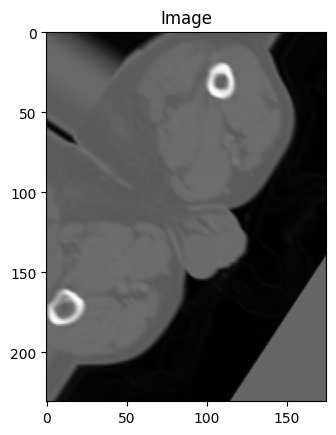

In [34]:
array = nib.load('assets/ct.nii.gz').get_fdata()
array = array[np.newaxis, :, :]

rotator = RandRotate(prob=0.9, range_z=0.6)
rotated_array = rotator(array)

show_slice_4d(rotated_array)

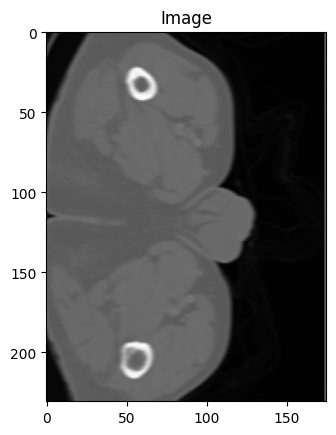

In [35]:
show_slice_4d(array)

--------------------------------------------------------

### Center Spatial Crop

In [36]:
from monai.transforms import CenterSpatialCrop

(1, 512, 512, 240)
torch.Size([1, 200, 200, 40])


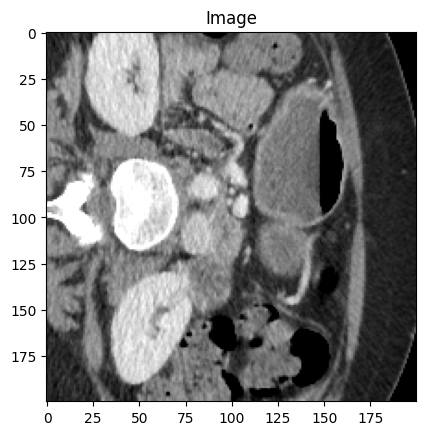

In [37]:
array = nib.load('assets/ct_windowed.nii.gz').get_fdata()
center_cropper = CenterSpatialCrop(roi_size=[200,200,40])

array = array[np.newaxis, :, :]

cropped_array = center_cropper(array)
print(array.shape)
print(cropped_array.shape)
show_slice_4d(cropped_array)

-------------------------------------------------------------------

### Random Spatial Crop

In [38]:
from monai.transforms import RandSpatialCrop

(1, 512, 512, 240)
torch.Size([1, 300, 300, 40])


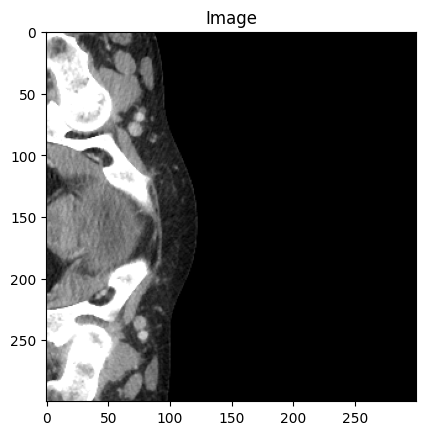

In [41]:
array = nib.load('assets/ct_windowed.nii.gz').get_fdata()
random_cropper = RandSpatialCrop(roi_size=[300,300,40], random_size=False)

array = array[np.newaxis, :, :]


cropped_array = random_cropper(array)
print(array.shape)
print(cropped_array.shape)
show_slice_4d(cropped_array)

-------------------------------------------------------------

### Border padding

In [42]:
from monai.transforms import BorderPad

(1, 231, 175, 301)
torch.Size([1, 251, 195, 341])


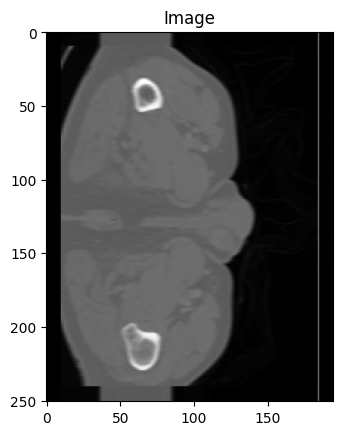

In [43]:
array = nib.load('assets/ct.nii.gz').get_fdata()
add_border = BorderPad(spatial_border=[10,10,20], mode='minimum')

array = array[np.newaxis, :, :]
bordered_array = add_border(array)

print(array.shape)
print(bordered_array.shape)

show_slice_4d(bordered_array, 30)

-------------------------------------------------------------

### Random ajustment of the contrast

In [44]:
from monai.transforms import RandAdjustContrast

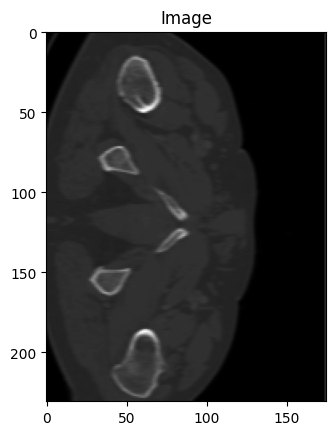

In [47]:
array = nib.load('assets/ct.nii.gz').get_fdata()
add_border = RandAdjustContrast(prob=1.0)

array = array[np.newaxis, :, :]
bordered_array = add_border(array)

show_slice_4d(bordered_array, 30)

-----------------------------------------------------------

### Rand Coarse Dropout

In [48]:
from monai.transforms import RandCoarseDropout

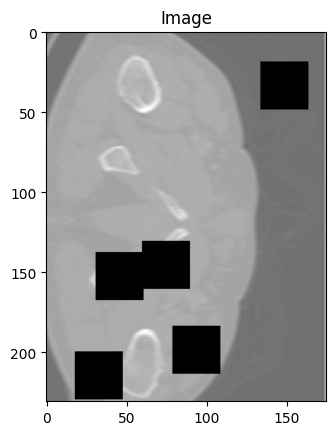

In [51]:
array = nib.load('assets/ct.nii.gz').get_fdata()
add_border = RandCoarseDropout(prob=1, holes=50, spatial_size=30, fill_value=-3000)

array = array[np.newaxis, :, :]
bordered_array = add_border(array)

show_slice_4d(bordered_array, 30)

In [4]:
from pycad.preprocessing import DicomCTWindowing

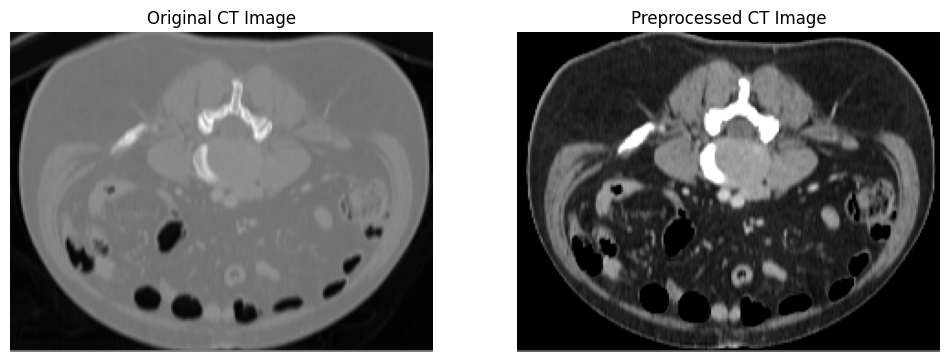

In [6]:
path = 'assets/ct'
processor = DicomCTWindowing(visualize=True)
processor.convert(path, 'assets')